# 4 Regression on a given datase


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, linear_model
from sklearn.tree import DecisionTreeRegressor

In [43]:
X_test = np.load('../data/Regression_datasets_ex4/X_test.npy')
y_test = np.load('../data/Regression_datasets_ex4/y_test.npy')

X_train = np.load('../data/Regression_datasets_ex4/X_train.npy')
y_train = np.load('../data/Regression_datasets_ex4/y_train.npy')

X_train , X_val , y_train , y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0, shuffle=True)

print(f"Dimensions de X_train: {X_train.shape}")
print(f"Dimensions de y_train: {y_train.shape}")
print(f"Dimensions de X_val: {X_val.shape}")
print(f"Dimensions de y_val: {y_val.shape}")
print(f"Dimensions de X_test: {X_test.shape}")
print(f"Dimensions de y_test: {y_test.shape}")

Dimensions de X_train: (160, 200)
Dimensions de y_train: (160, 1)
Dimensions de X_val: (40, 200)
Dimensions de y_val: (40, 1)
Dimensions de X_test: (200, 200)
Dimensions de y_test: (200, 1)


C'est parti pour un peu (le temps de juste deux cellules) de visualisation des données !

In [44]:
# Représentation d'un seul échantillon de X_train
import random
random = random.randint(0, X_train.shape[0])
print(f"X_train n°{random}: {X_train[random]}")

X_train n°141: [8.18724552e-02 2.25451592e-01 5.13746172e-01 4.53508126e-01
 4.82899910e-01 5.96431385e-01 1.78895263e-01 6.05972898e-01
 7.68671588e-01 4.06112583e-01 4.60724852e-01 5.20559181e-01
 3.97837102e-01 4.69938734e-01 9.49232439e-01 4.26545557e-01
 6.27526403e-01 8.56318558e-01 4.13565468e-01 8.08220932e-01
 8.17842250e-01 4.41882828e-02 4.94307018e-02 6.38511473e-01
 4.71099196e-01 8.50671107e-01 3.52560597e-01 4.89716959e-01
 2.57765049e-01 7.19707592e-01 2.55444934e-01 5.22134319e-01
 3.85784212e-01 2.46325892e-01 4.74400846e-01 7.45290306e-01
 1.62914200e-02 1.27792345e-01 7.66110440e-01 9.44293501e-01
 8.97511184e-01 5.57731297e-01 1.13166812e-01 3.30179875e-01
 4.49396674e-01 7.43087345e-01 9.67457162e-01 6.29841065e-01
 3.59799195e-01 8.26198375e-01 5.14000163e-01 5.71494065e-01
 4.20056475e-01 7.91549479e-02 2.33758922e-01 4.91532077e-01
 6.55827109e-01 5.13872859e-01 3.73097891e-02 3.57596749e-01
 9.05116397e-01 1.33997318e-01 7.69278848e-01 1.29659333e-01
 5.019374

Y_train n°0: [2.91789214]
Y_train n°20: [3.47341855]
Y_train n°40: [6.00275347]
Y_train n°60: [5.97102809]
Y_train n°80: [6.88077219]
Y_train n°100: [4.32575533]
Y_train n°120: [4.5063907]
Y_train n°140: [4.82264897]
Moyenne de y_train: 4.927251990231428
Médiane de y_train: 4.919536218871528
Ecart-type de y_train: 0.9208621187029038


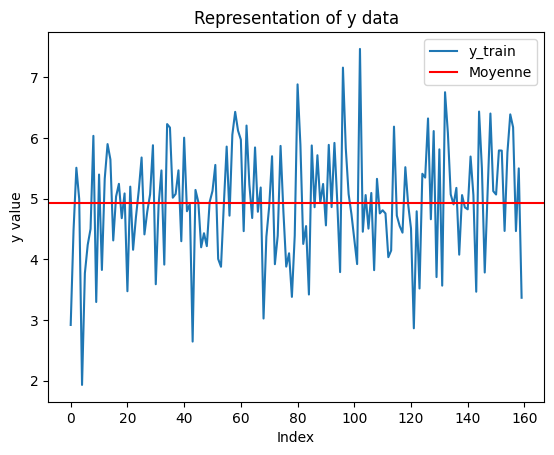

In [45]:
# Représentation de plusieurs échantillons de Y_train
for i in range (0, y_train.shape[0],  20):
    print(f"Y_train n°{i}: {y_train[i]}")

# Données statistiques sur y_train
print(f'Moyenne de y_train: {np.mean(y_train)}')
print(f'Médiane de y_train: {np.median(y_train)}')
print(f'Ecart-type de y_train: {np.std(y_train)}')

# Tracer la représentation des données y
# Chaque point représente une valeur de y
plt.figure()
plt.plot(y_train)
plt.title("Representation of y data")
plt.xlabel("Index")
plt.ylabel("y value")
# Déssiner une ligne horizontale pour la moyenne
plt.axhline(y=np.mean(y_train), color='r', linestyle='-', label="Moyenne")
plt.legend(["y_train", "Moyenne"])
plt.show()

Maintenant que nous savons à quoi nos données ressemblent.\
Nous pouvons commencer à entrainer des modèles.\
Commençons par définir une méthode qui nous servira pour évaluer chaque modèle.

In [46]:
y_test = y_test.ravel() # Utile pour enlever certains warning
y_val = y_val.ravel() # Utile pour enlever certains warning
y_train = y_train.ravel() # Utile pour enlever certains warning

# Fonction pour évaluer et afficher les performances du modèle
# Si le paramètre see_some_outputs est différent de 0,
# alors on affiche les valeurs prédites et les valeurs attendues pour les premiers échantillons
def evaluate_model(model, see_some_outputs = 0, name=None):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    
    if name:
        print(f"Modèle: {name}, R2 Score: {r2:.4f}")
    else:
        print(f"Modèle: {model.__class__.__name__}, R2 Score: {r2:.4f}")

    for i in range(see_some_outputs):
        print(f"Valeur correcte attendue: {y_val[i]:.4f} Valeur prédite: {y_pred[i]:.4f}")
    return r2

Dans les cellules suivantes, le lien renvoie à la documentation officielle des modèles.\
Ils nous sont destinés pour que nous puissions les consulter rapidement.

In [47]:
# Linear Regression
classical_linear_model = LinearRegression()
evaluate_model(classical_linear_model)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Ridge Regression
ridge = Ridge(alpha=1) # default alpha=1
evaluate_model(ridge)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

# Lasso Regression
lasso = Lasso(alpha=1) # default alpha=1
evaluate_model(lasso)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

# Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=5)
evaluate_model(tree)
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

# Bayesian Ridge Regression
from sklearn import linear_model as lm
bayesianRidge = lm.BayesianRidge()
evaluate_model(bayesianRidge)
#https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression

# Tweedie Regression
from sklearn.linear_model import TweedieRegressor
tweedieRegressor = TweedieRegressor(power=1, alpha=0.5, link='log')
evaluate_model(tweedieRegressor)
#https://scikit-learn.org/stable/modules/linear_model.html#usage

# SGD Regressor
SGDRegressor = lm.SGDRegressor()
evaluate_model(SGDRegressor)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

Modèle: LinearRegression, R2 Score: 0.5382
Modèle: Ridge, R2 Score: 0.6235
Modèle: Lasso, R2 Score: -0.0098
Modèle: DecisionTreeRegressor, R2 Score: -0.3027
Modèle: BayesianRidge, R2 Score: 0.6218
Modèle: TweedieRegressor, R2 Score: 0.4330
Modèle: SGDRegressor, R2 Score: 0.5219


0.521907966160863

Le meilleur modèle est Ridge, avec un R2 Score de 0.71.\
C'est encourageant mais c'est encore loin de l'objectif de 0.92.\
Essayons les mêmes modèles mais cette fois-ci en utilisant GridSearch\
avec Cross Validation pour trouver les meilleurs HP.

In [48]:
# Ridge Regression avec recherche du meilleur hyperparamètre alpha
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
evaluate_model(ridge_cv, 0, "Ridge")
print(f"Meilleur alpha pour Ridge : {ridge_cv.best_params_['alpha']}")

# Lasso Regression avec recherche du meilleur hyperparamètre alpha
lasso = Lasso()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
evaluate_model(lasso_cv, 0, "Lasso")
print(f"Meilleur alpha pour Lasso : {lasso_cv.best_params_['alpha']}")

# Decision Tree Regressor avec recherche du meilleur hyperparamètre max_depth
tree = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 4, 6, 8, 10]}
tree_cv = GridSearchCV(tree, param_grid, cv=5)
evaluate_model(tree_cv, 0, "DecisionTree")
print(f"Meilleur max_depth pour Decision Tree : {tree_cv.best_params_['max_depth']}")

# Bayesian Ridge Regresssion avec recherche du meilleur hyperparamètre max_iter
bayesianRidge = lm.BayesianRidge()
param_grid = {'max_iter': [100, 300, 500, 1000, 1500]}
bayesianRidge_cv = GridSearchCV(bayesianRidge, param_grid, cv=5)
evaluate_model(bayesianRidge_cv, 0, "Bayesain Ridge")
print(f"Meilleur n_iter pour Bayesian Ridge : {bayesianRidge_cv.best_params_['max_iter']}")

# Cross-Validation Scores
linear_scores = cross_val_score(classical_linear_model, X_train, y_train, cv=5)
ridge_scores = cross_val_score(ridge_cv.best_estimator_, X_train, y_train, cv=5)
tree_scores = cross_val_score(tree_cv.best_estimator_, X_train, y_train, cv=5)
lasso_scores = cross_val_score(lasso_cv.best_estimator_, X_train, y_train, cv=5)
bayesianRidge_scores = cross_val_score(bayesianRidge_cv.best_estimator_, X_train, y_train, cv=5)

print(f"Lasso Regression CV R2 Scores: {lasso_scores}")
print(f"Ridge Regression CV R2 Scores: {ridge_scores}")
print(f"Decision Tree Regression CV R2 Scores: {tree_scores}")
print(f"Bayesian Ridge Regression CV R2 Scores: {bayesianRidge_scores}")


Modèle: Ridge, R2 Score: 0.6235
Meilleur alpha pour Ridge : 1
Modèle: Lasso, R2 Score: 0.9316
Meilleur alpha pour Lasso : 0.01
Modèle: DecisionTree, R2 Score: 0.0195
Meilleur max_depth pour Decision Tree : 2
Modèle: Bayesain Ridge, R2 Score: 0.6218
Meilleur n_iter pour Bayesian Ridge : 100
Lasso Regression CV R2 Scores: [0.90796241 0.89525798 0.94424475 0.92343604 0.90825653]
Ridge Regression CV R2 Scores: [0.31529604 0.62371551 0.52968268 0.52135027 0.46034669]
Decision Tree Regression CV R2 Scores: [ 0.05275074 -0.33425968 -0.00424388 -0.30270476 -0.3089584 ]
Bayesian Ridge Regression CV R2 Scores: [0.26748684 0.62851605 0.53793814 0.5213607  0.4456924 ]


In [49]:
# Le meilleur estimateur est celui avec le score R2 le plus élevé
def evaluate_model_on_test_set(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"Modèle: {model.__class__.__name__}, R2 Score: {r2:.4f}")
    return r2
best_estimator = max([classical_linear_model, ridge_cv.best_estimator_, tree_cv.best_estimator_, lasso_cv.best_estimator_, bayesianRidge_cv.best_estimator_], key=lambda x: evaluate_model_on_test_set(x))
print(f"\n -------- \nLe meilleur estimateur est: {best_estimator.__class__.__name__} avec un R2 Score de {evaluate_model_on_test_set(best_estimator):.4f}")


Modèle: LinearRegression, R2 Score: 0.5089
Modèle: Ridge, R2 Score: 0.5876
Modèle: DecisionTreeRegressor, R2 Score: 0.0176
Modèle: Lasso, R2 Score: 0.9141
Modèle: BayesianRidge, R2 Score: 0.5815
Modèle: Lasso, R2 Score: 0.9141

 -------- 
Le meilleur estimateur est: Lasso avec un R2 Score de 0.9141


C'est gagné !\
L'estimateur Bayes pour cet ensemble de données est Lasso avec un alpha=0,01.\
Son score R2 est d'environ 0,92.